<a href="https://colab.research.google.com/github/UdayLab/Hands-on-Pattern-Mining/blob/main/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: Spatial Databases: Representation, Creation, and Statistics

## Installation of PAMI library

In [1]:
!pip install --upgrade pami

## Download a sample database

In [ ]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/spatioTransactionalDatabases/spatioTransactional_T10I4D100K.csv

--2024-12-03 08:04:04--  https://web-ext.u-aizu.ac.jp/~udayrage/datasets/spatioTemporalDatabases/spatiotemporal_T10I4D100K.csv
Resolving web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)... 163.143.103.34
Connecting to web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)|163.143.103.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8530208 (8.1M) [text/csv]
Saving to: ‘spatiotemporal_T10I4D100K.csv’

spatiotemporal_T10I 100%[===================>]   8.13M  5.32MB/s    in 1.5s    

2024-12-03 08:04:07 (5.32 MB/s) - ‘spatiotemporal_T10I4D100K.csv’ saved [8530208/8530208]



## Generating Synthetic Geo-referenced Transactional Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import geoReferentialTransactionalDatabase as db
  
obj = db.geoReferentialTransactionalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximalXaxisCoordinate,
        y2=maximalYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [2]:
from PAMI.extras.syntheticDataGenerator import GeoReferentialTransactionalDatabase as db

obj = db.GeoReferentialTransactionalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferencedTransactionalDatabase.csv')
#read the generated transactions into a dataframe
GRTDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 14.117074012756348


AttributeError: 'GeoReferentialTransactionalDatabase' object has no attribute 'getMemoryRSS'

## Generating Synthetic Geo-referenced Temporal Database

### Generic



```python
from PAMI.extras.syntheticDataGenerator import geoReferentialTemporalDatabase as db
  
obj = db.geoReferentialTemporalDatabase(
        databaseSize=numberOfTransactions,
        avgItemsPerTransaction=averageNumberOfItemsInATransaction,
        numItems=totalNumberOfItems,
        occurrenceProbabilityOfSameTimestamp=probabilityWithWhichTheNextTransactionAppearsAtTheSameTimeStamp,
        occurrenceProbabilityToSkipSubsequentTimestamp=probabilityWithWhichTheNextTransactionSkipsTheNextTimeStamp,
        x1=lowestXaxisCoordinate,
        y1=lowestYaxisCoordinate,
        x2=maximumXaxisCoordinate,
        y2=maximumYaxisCoordinate,
        sep='\t'
        )
obj.create()
obj.save('outputFileName')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [ ]:
from PAMI.extras.syntheticDataGenerator \
    import geoReferentialTemporalDatabase as db

obj = db.geoReferentialTemporalDatabase(
        databaseSize=1000,
        avgItemsPerTransaction=10,
        numItems=1000,
        occurrenceProbabilityOfSameTimestamp=0,
        occurrenceProbabilityToSkipSubsequentTimestamp=0,
        x1=0,
        y1=0,
        x2=100,
        y2=100,
        sep='\t'
        )
obj.create()
obj.save('geoReferentialTemporalDatabase.csv')
GRTempDF=obj.getTransactions()
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

ImportError: cannot import name 'geoReferentialTemporalDatabase' from 'PAMI.extras.syntheticDataGenerator' (/usr/local/lib/python3.10/dist-packages/PAMI/extras/syntheticDataGenerator/__init__.py)

## Converting a Georeferenced Dataframe into a Georeferenced Transactional Database

### Generic



```python

from PAMI.extras.convert import DF2DB as alg

obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(oFile='outputFileName.txt', condition='>=|>|<=|<|==|!=', thresholdValue=thresholdValue)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 3

In [3]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np
#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
columns=['POINT(0 0)', 'POINT(0 1)',
'POINT(0 2)', 'POINT(0 3)']
)
obj = alg.DF2DB(dataFrame)
obj.convert2TransactionalDatabase(
oFile='georeferencedTransactionalDatabase.txt',
condition='>=', thresholdValue=36
)
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.021925687789916992
Memory (RSS): 166391808
Memory (USS): 144105472


## Converting a Georeferenced Dataframe into a Georeferenced Temporal Database

### Generic



```python
from PAMI.extras.convert import DF2DB as alg


#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(oFile='outputFileName', condition='>=|>|<=|<|==|!=', thresholdValue=36)

print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 4

In [4]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 5 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(5, 4))
dataFrame = pd.DataFrame(data,
             columns=['POINT(0 0)', 'POINT(0 1)',
             'POINT(0 2)', 'POINT(0 3)']
            )
# Adding a timestamp column with specific values
timestamps = [1, 3, 3, 5, 8]
dataFrame.insert(0, 'timestamp', timestamps)

#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2TemporalDatabase(
        oFile='georeferencedTemporalDatabase.txt',
       condition='>=', thresholdValue=36
     )
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.005326509475708008
Memory (RSS): 166391808
Memory (USS): 144150528


## Getting Statistical Details for a Geo-referenced Transactional Database

### Generic


```
from PAMI.extras.dbStats import GeoreferencedTransactionalDatabase as stat

obj = stat.GeoreferencedTransactionalDatabase(iFile="transactionalDatabase.csv")
obj.run()
obj.printStats()
obj.plotGraphs()
obj.plotLocations()
```



### Example 5

Database size (total no of transactions) : 4
Number of items : 4
Minimum Transaction Size : 3
Average Transaction Size : 3.0
Maximum Transaction Size : 3
Standard Deviation Transaction Size : 0.0
Variance in Transaction Sizes : 0
Sparsity : 0.25


AttributeError: 'GeoreferencedTransactionalDatabase' object has no attribute 'plotLocations'

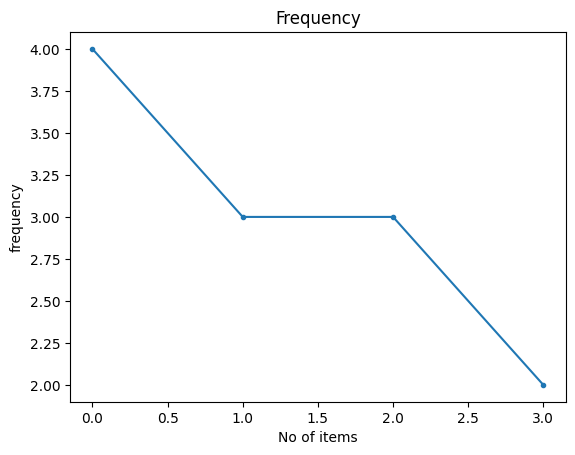

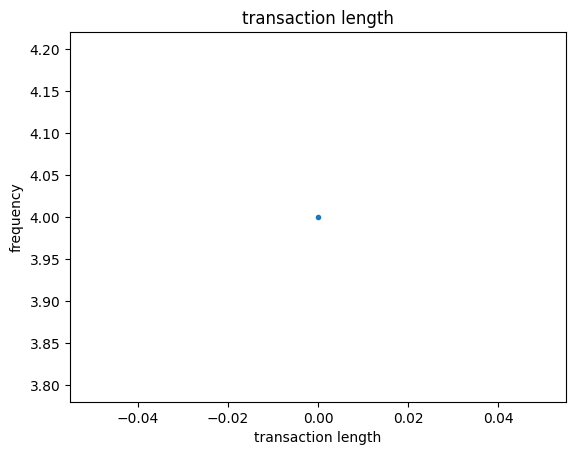

In [6]:
from PAMI.extras.dbStats import GeoreferencedTransactionalDatabase as stat

obj = stat.GeoreferencedTransactionalDatabase(iFile="georeferencedTransactionalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()
obj.plotLocations()

## Getting Statistical Details for a Geo-referenced Timeseries Database

### Generic

```python
from PAMI.extras.dbStats import  GeoreferencedTemporalDatabase as stat

obj = stat.GeoreferencedTemporalDatabase(iFile="georeferencedTemporalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()

```

### Example 6

Database size : 5
Number of items : 4
Minimum Transaction Size : 1
Average Transaction Size : 2.0
Maximum Transaction Size : 3
Minimum Inter Arrival Period : 1
Average Inter Arrival Period : 1.0
Maximum Inter Arrival Period : 1
Minimum periodicity : 2
Average periodicity : 2.5
Maximum periodicicty : 4
Standard Deviation Transaction Size : 0.6324555320336759
Variance : 0.5
Sparsity : 0.5


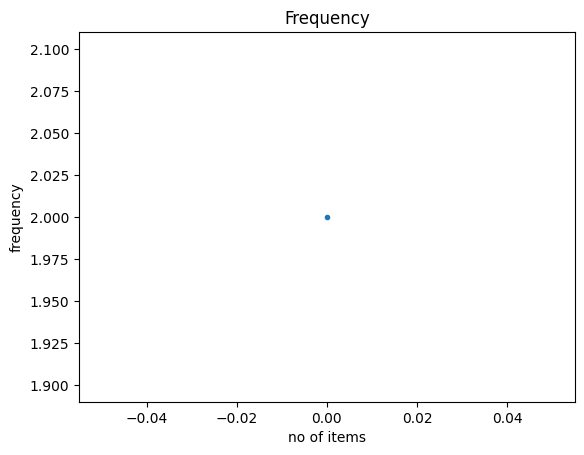

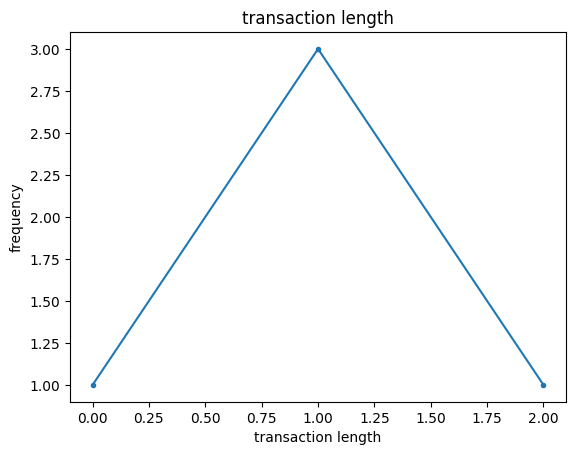

In [8]:
from PAMI.extras.dbStats import  GeoreferencedTemporalDatabase as stat

obj = stat.GeoreferencedTemporalDatabase(iFile="georeferencedTemporalDatabase.txt")
obj.run()
obj.printStats()
obj.plotGraphs()